## Preprocessing and Modeling


* Task :
    Then perform necessary preprocessing steps

1. **REGRESSION**<br>
Then create a classification and regression model for a given dataset.
For regression use linear regression, ridge regression and lasso regression, SVR, Decision tree regressor and random forest regressor along with cross validation and hyperparameter tuning.Try to showcase the MSE value for each model and try to find out the best possible model based on the R2 value.


In [14]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
%matplotlib inline


### Importing cleaned dataset

In [4]:
data = pd.read_csv('Algerian_forest_fires_data_CLEAN.csv')

In [5]:
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,2
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,2
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,2


### Splitting dataset

In [6]:
X = data.drop(['FWI'], axis=1)
y = data['FWI']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.3 , random_state=43)

In [9]:
X_train.shape , X_test.shape

((170, 11), (73, 11))

### Multicolinearity handling

In [16]:
correlation = X_train.corr()
correlation.style.background_gradient(cmap ='coolwarm')

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.648906,-0.342813,-0.339154,0.690252,0.494019,0.387230,0.620408,0.469073,0.545191,0.280393
RH,-0.648906,1.000000,0.345667,0.251604,-0.664507,-0.385380,-0.214897,-0.698720,-0.332961,-0.466885,-0.428045
Ws,-0.342813,0.345667,1.000000,0.228688,-0.273050,-0.047916,0.017331,-0.051706,-0.024274,-0.165150,-0.204352
Rain,-0.339154,0.251604,0.228688,1.000000,-0.557413,-0.261067,-0.275297,-0.337277,-0.271218,-0.379779,-0.069696
FFMC,0.690252,-0.664507,-0.273050,-0.557413,1.000000,0.580391,0.484454,0.739544,0.564666,0.776082,0.232271
DMC,0.494019,-0.385380,-0.047916,-0.261067,0.580391,1.000000,0.879519,0.666973,0.984028,0.572174,0.214006
DC,0.387230,-0.214897,0.017331,-0.275297,0.484454,0.879519,1.000000,0.498232,0.948133,0.478165,-0.080107
ISI,0.620408,-0.698720,-0.051706,-0.337277,0.739544,0.666973,0.498232,1.000000,0.623901,0.729549,0.286645
BUI,0.469073,-0.332961,-0.024274,-0.271218,0.564666,0.984028,0.948133,0.623901,1.000000,0.558162,0.108929
Classes,0.545191,-0.466885,-0.165150,-0.379779,0.776082,0.572174,0.478165,0.729549,0.558162,1.000000,0.179683


In [18]:
#function  to handle multicoliinearity
def correlation(df, seuil):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > seuil: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [24]:
correlate_feat = correlation(X_train, 0.75)
correlate_feat 

{'BUI', 'Classes', 'DC'}

In [25]:
#dropping high correlated feature
X_train.drop(correlate_feat, axis=1 , inplace=True)
X_test.drop(correlate_feat, axis=1 , inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
X_train.shape , X_test.shape

((170, 8), (73, 8))

### Standardization

Text(0.5, 1.0, 'Test data Before Scaling')

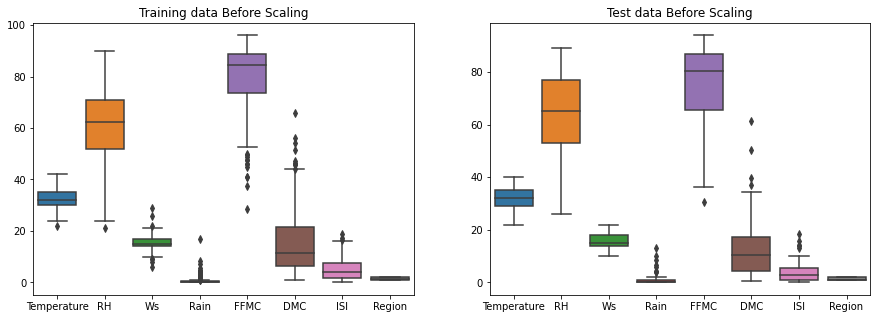

In [35]:
plt.subplots(figsize=(15, 5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Training data Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_test)
plt.title('Test data Before Scaling')

### Applying StandarScaler

In [38]:
def standardization(X_train,X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test) # always apply transform on test data
    return X_train_scaled , X_test_scaled    

In [39]:
X_train_scaled, X_test_scaled = standardization(X_train,X_test)

### Plotting

Text(0.5, 1.0, 'Test data Before Scaled')

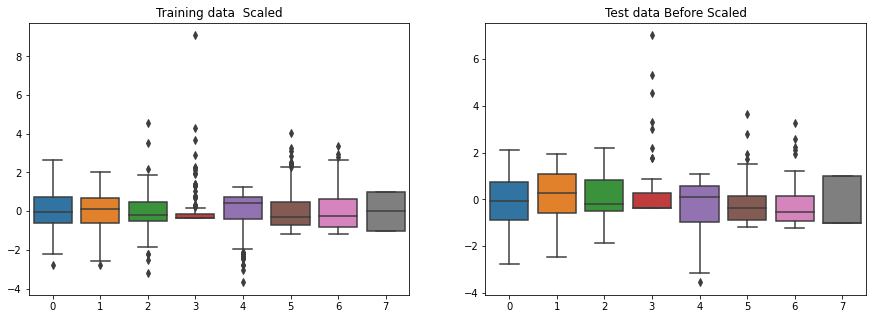

In [43]:
plt.subplots(figsize=(15, 5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train_scaled)
plt.title('Training data  Scaled')
plt.subplot(1,2,2)
sns.boxplot(data=X_test_scaled)
plt.title('Test data Before Scaled')

## REGRESSION

**Task:**
    For regression use 
    linear regression, 
    ridge regression and lasso
regression, 
SVR, 
Decision tree regressor and random forest
regressor along with cross validation and hyperparameter tuning.
Try
to showcase the MSE value for each model and try to find out the
best possible model based on the R2 value.

### Linear Regression

In [44]:
line_reg = LinearRegression()
line_reg.fit(X_train_scaled,y_train)


LinearRegression()

In [53]:
lr_predict = line_reg.predict(X_test_scaled)

In [68]:
pd.DataFrame(data={"Predict Values":lr_predict, "Actual Values":y_test})

,Predict Values,Actual Values
59,10.980679,10.7
228,18.924592,19.3
78,14.343493,16.1
222,-0.363992,0.3
76,4.305979,4.2
...,...,...
41,1.658685,0.9
189,5.756711,5.9
94,-0.849309,0.0
9,1.886282,0.9


In [70]:
MSE = mean_squared_error(y_test,lr_predict)
r2 = r2_score(y_test,lr_predict)
print('MSE : {:.5f}'.format(MSE))
print('r2 score : {:.5f}'.format(r2))

MSE : 1.03000
r2 score : 0.98050


### Ridge Regression

In [71]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(X_train_scaled,y_train)
ridge_predict = ridge_reg.predict(X_test_scaled)
MSE = mean_squared_error(y_test,ridge_predict)
r2 = r2_score(y_test,ridge_predict)
print('MSE : {:.5f}'.format(MSE))
print('r2 score : {:.5f}'.format(r2))

MSE : 1.07154
r2 score : 0.97971


In [72]:
pd.DataFrame(data={"Predict Values":ridge_predict, "Actual Values":y_test})

,Predict Values,Actual Values
59,10.952950,10.7
228,18.843674,19.3
78,14.319011,16.1
222,-0.373487,0.3
76,4.378888,4.2
...,...,...
41,1.665455,0.9
189,5.784773,5.9
94,-0.934998,0.0
9,1.864961,0.9


### Lasso Regression

In [86]:
lasso_reg = Lasso()
lasso_reg.fit(X_train_scaled,y_train)
lasso_predict = lasso_reg.predict(X_test_scaled)
MSE = mean_squared_error(y_test,lasso_predict)
r2 = r2_score(y_test,lasso_predict)
print('MSE : {:.5f}'.format(MSE))
print('r2 score : {:.5f}'.format(r2))

MSE : 2.53922
r2 score : 0.95192


In [74]:
pd.DataFrame(data={"Predict Values":lasso_predict, "Actual Values":y_test})

,Predict Values,Actual Values
59,10.952950,10.7
228,18.843674,19.3
78,14.319011,16.1
222,-0.373487,0.3
76,4.378888,4.2
...,...,...
41,1.665455,0.9
189,5.784773,5.9
94,-0.934998,0.0
9,1.864961,0.9


### Support Vector Regressor

In [75]:
svr_reg = SVR()
svr_reg.fit(X_train_scaled,y_train)
svr_predict = svr_reg.predict(X_test_scaled)
MSE = mean_squared_error(y_test,svr_predict)
r2 = r2_score(y_test,svr_predict)
print('MSE : {:.5f}'.format(MSE))
print('r2 score : {:.5f}'.format(r2))

MSE : 9.61314
r2 score : 0.81799


In [76]:
pd.DataFrame(data={"Predict Values":svr_predict, "Actual Values":y_test})

,Predict Values,Actual Values
59,10.321798,10.7
228,14.029248,19.3
78,14.511067,16.1
222,-0.388111,0.3
76,4.401582,4.2
...,...,...
41,1.250098,0.9
189,5.743210,5.9
94,0.857320,0.0
9,1.828150,0.9


Text(0.5, 1.0, 'Plotting predict value')

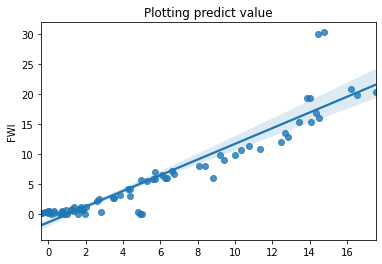

In [79]:
_=sns.regplot(x=svr_predict , y = y_test)
plt.title("Plotting predict value")

### Decision tree regressor

In [80]:
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train_scaled,y_train)
decision_tree_reg_predict = decision_tree_reg.predict(X_test_scaled)
MSE = mean_squared_error(y_test,decision_tree_reg_predict)
r2 = r2_score(y_test,decision_tree_reg_predict)
print('MSE : {:.5f}'.format(MSE))
print('r2 score : {:.5f}'.format(r2))

MSE : 2.16315
r2 score : 0.95904


Text(0.5, 1.0, 'Plotting Decision tree predicted value')

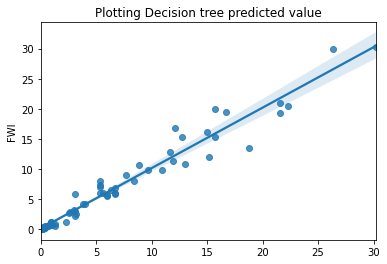

In [82]:
_=sns.regplot(x=decision_tree_reg_predict , y = y_test)
plt.title("Plotting Decision tree predicted value")

### random forest regressor

In [83]:
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train_scaled,y_train)
random_forest_reg_predict = random_forest_reg.predict(X_test_scaled)
MSE = mean_squared_error(y_test,random_forest_reg_predict)
r2 = r2_score(y_test,random_forest_reg_predict)
print('MSE : {:.5f}'.format(MSE))
print('r2 score : {:.5f}'.format(r2))

MSE : 1.17389
r2 score : 0.97777


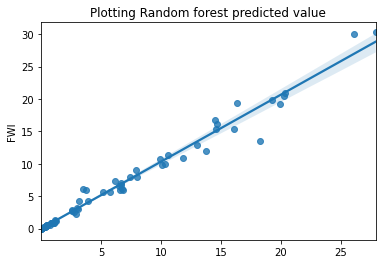

In [85]:
_=sns.regplot(x= random_forest_reg_predict , y = y_test)
_=plt.title("Plotting Random forest predicted value")

### **R2 score value for each model**

| Models     | R2 score  |
| ----------- | ----------- |
| Random Forest Regressor     | 97.77 % |
| Linear Regression  | 98.05 |
| Ridge Regression  |97.97  |
| Lasso Regression  |  95.19|
| Support Vector Regressor     | 81.79 |
|Decision Tree Regressor       | 95.90 |

* The best possible model based on the R2 value are : **Linear Regression and Ridge Regression Random Forest Regressor**

# Hyperparameter tunning

### Random Forest Regressor

Now we will be performing the tuning of hyperparameters of Random forest model. 
The hyperparameters that we will tune includes **max_features and the n_estimators.**<br>
The **GridSearchCV()**  will be used to perform the hyperparameter tuning. 

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()
max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [89]:
grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [91]:
best_rf_grid = grid.best_estimator_ 
best_rf_grid_predict = best_rf_grid.predict(X_test_scaled)
r2 = r2_score(y_test,best_rf_grid_predict)
print('r2 score : {:.5f}'.format(r2))


r2 score : 0.97588


#### Ridge Regression tunning

In [92]:
from sklearn.exceptions import FitFailedWarning, ConvergenceWarning
import warnings 
warnings.filterwarnings(action= 'ignore')

params = [{'alpha': (np.logspace(-11, 11, 110)), 
                'solver': ['auto', 'svd','lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}] 

ridge = Ridge()
grid_ridge = GridSearchCV(estimator = ridge, param_grid= params, cv=5, n_jobs= -1)
grid_ridge.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid=[{'alpha': array([1.00000000e-11, 1.59160342e-11, 2.53320143e-11, 4.03185205e-11,
       6.41710949e-11, 1.02134934e-10, 1.62558310e-10, 2.58728361e-10,
       4.11792942e-10, 6.55411053e-10, 1.04315447e-09, 1.66028822e-09,
       2.64252040e-09, 4.20584449e-09, 6.69403646e-09, 1.06542513e-08,
       1.69573427e-08, 2.69893646e-08, 4.2956...
       5.77388181e+06, 9.18973001e+06, 1.46264057e+07, 2.32794372e+07,
       3.70516318e+07, 5.89715037e+07, 9.38592467e+07, 1.49386698e+08,
       2.37764378e+08, 3.78426596e+08, 6.02305063e+08, 9.58630795e+08,
       1.52576005e+09, 2.42840490e+09, 3.86505754e+09, 6.15163877e+09,
       9.79096928e+09, 1.55833401e+10, 2.48024974e+10, 3.94757396e+10,
       6.28297219e+10, 1.00000000e+11]),
                          'solver': ['auto', 'svd', 'lsqr', 'sparse_cg', 'sag',
                                     'saga', 'lbfgs']}])

In [93]:
best_ridge_grid = grid_ridge.best_estimator_ 
best_ridge_grid_predict = best_ridge_grid.predict(X_test_scaled)
r2 = r2_score(y_test,best_ridge_grid_predict)
print('r2 score : {:.5f}'.format(r2))

r2 score : 0.97777


# Features selection

In [95]:
best_rf_grid.feature_importances_

array([0.01425294, 0.01811717, 0.00660987, 0.02510108, 0.25728928,
       0.20433358, 0.47218649, 0.00210959])

In [101]:
feature_importances = best_rf_grid.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values('importance', ascending= False)
importance_df

,feature,importance
6,ISI,0.472186
4,FFMC,0.257289
5,DMC,0.204334
3,Rain,0.025101
1,RH,0.018117
0,Temperature,0.014253
2,Ws,0.006610
7,Region,0.002110


Text(0, 0.5, 'Features')

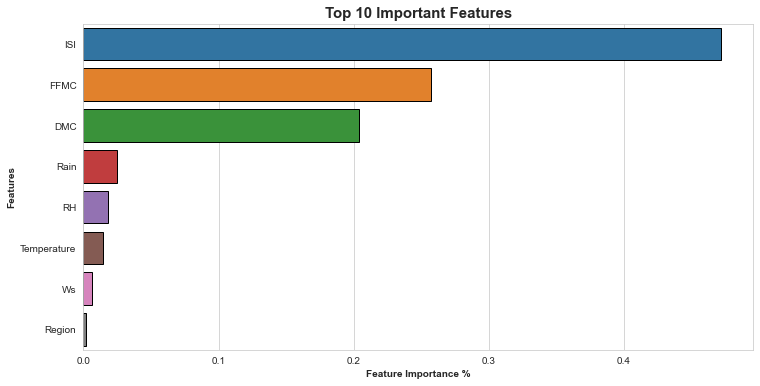

In [104]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
ax = sns.barplot(data=importance_df, x='importance', y='feature',ec = 'black')
ax.set_title('Top 10 Important Features', weight='bold',fontsize = 15)
ax.set_xlabel('Feature Importance %',weight='bold')
ax.set_ylabel('Features',weight='bold')

" to be continued !"

# CLASSIFICATION


In classification models try to use logistic regression, SVM, decision tree, naive bayes and 
random forest along with hyperparametertuning and cross validation and print your classification report and 
showcase the best possible model based on that report.